# Linear discriminant analysis

In [1]:
%matplotlib inline
# first som imports
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

#data
c1 = Matrix([[1,0],
             [1,1],
             [2,2],
             [2,3]])
c2 = Matrix([[3,0],
             [3,1],
             [2,0]])
print("c1=\n"+ str(c1) + "\nc2=\n" + str(c2))

c1=
Matrix([[1, 0], [1, 1], [2, 2], [2, 3]])
c2=
Matrix([[3, 0], [3, 1], [2, 0]])


Tranposed version of c1 and c2
Matrix([[1, 1, 2, 2], [0, 1, 2, 3]])
Matrix([[3, 3, 2], [0, 1, 0]])


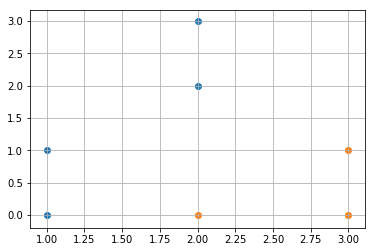

In [2]:
# plotting the data
c1t = transpose(c1)
c2t = transpose(c2)
print("Tranposed version of c1 and c2")
print(str(c1t) + "\n" + str(c2t))
plt.scatter(c1t.tolist()[0], c1t.tolist()[1])
plt.scatter(c2t.tolist()[0], c2t.tolist()[1])
xax = np.arange(0,4,0.01)
#yl = -xax + 3.0
#plt.plot(xax,yl)  # <= Testing the below tesis.
plt.grid()

It feals like we can draw a line from (0,3) to (3.0) and project the data on that. That perhaps whuld be a good reduction.

There was somthing about calculating the mean of each of the cases. That was used to move the data down to origo
$$ 
mean(c_{1xy}) = [\frac{\sum{xi}}{n}, \frac{\sum{yi}}{n}]
$$

In [7]:
c1meanx = 0
c1meany = 0
c2meanx = 0 
c2meany = 0 
c1length = len(c1t.tolist()[0])- 1
c2length = len(c2t.tolist()[0]) -1 
print("c1length=" + str(c1length) + " c2length=" + str(c2length))
for i in np.arange(0,c1length):
    # Add all elements
    c1meanx += c1t.tolist()[0][i]  
    c1meany += c1t.tolist()[1][i] 
for i in np.arange(0, c2length):
    c2meanx += c1t.tolist()[0][i]  
    c2meany += c1t.tolist()[1][i]

c1meanx = c1meanx / (c1length + 1)
c1meany = c1meany / (c1length + 1)
c2meanx = c2meanx / (c2length + 1)
c2meany = c2meany / (c2length + 1)
print("c1meanx=" + str(c1meanx)+ " c1meany=" + str(c1meany))
print("c2meany=" + str(c2meanx) + " c2meany=" + str(cc2meany))
print("The sum of c1sumx=" + str(c1meanx) + " c1sumy=" + str(c1meanx))
print("The sum of c2sumx=" + str(c2meanx) + " c2sumy=" + str(c2meany))
c1mean = Matrix([[c1meanx],[c1meany]])
c2mean = Matrix([[c2meanx],[c2meany]])
print("Mean c1=\n" + str(c1mean) + " \nc2=\n" + str(c2mean))

c1length=3 c2length=2
c1meanx=1 c1meany=3/4
c2meany=2/3 c2meany=1/3
The sum of c1sumx=1 c1sumy=1
The sum of c2sumx=2/3 c2sumy=1/3
Mean c1=
Matrix([[1], [3/4]]) 
c2=
Matrix([[2/3], [1/3]])


# covarianse matrix for c1 and c2

Length=3
mean=
Matrix([[4/3], [1]])
Length=2
mean=
Matrix([[3], [1/2]])
covariance1=[[[0.0, 1.00000000000000], [-1.00000000000000, -1.00000000000000]], [[0.0, 1.00000000000000], [0.0, 0.0]], [[1.00000000000000, 2.00000000000000], [1.00000000000000, 1.00000000000000]]]
covariance2=[[[0.0, 3.00000000000000], [-3.00000000000000, -1.00000000000000]], [[0.0, 3.00000000000000], [-2.00000000000000, 0.0]]]


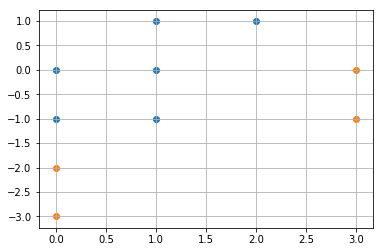

In [4]:
# for c1 the x and y componend is on its same deriction so it thus cov can bec calculated by
def cov(mat):
    '''Rerturns a covariance matrix of the input matrix
       mat is an 2d matrix with an left and rigth column'''
    trans = transpose(mat)
    #print(trans)
    # mean calculation
    sumx= 0
    sumy= 0
    length = len(trans.tolist()[0])-1
    print("Length=" + str(length))
    for i in np.arange(0,length):
        sumx += trans.tolist()[0][i]
        sumy += trans.tolist()[1][i]
    #print("sumx=" + str(sumx) + " sumy=" + str(sumy))
    mean = Matrix([[sumx/length],[sumy/length]])
    print("mean=\n" + str(mean))
    # cov(x,y)=(1/N)sum((x-xmean)(y-ymean))
    x = np.array(mat.tolist()[0]).astype(np.float)
    y = np.array(mat.tolist()[1]).astype(np.float)
    #print("x=" + str(x) + " y=" + str(y))
    covmax=[]
    for i in np.arange(0, length):
        #print("transtolist=" + str(trans.tolist()[0][i]) + "x[0]=" + str(x[0]))
        etrans= np.array(trans).astype(np.float)
        mx = etrans[0][i] - x
        my = etrans[1][i] - y
        #print("mx=" + str(mx) + " my=" + str(my))
        covmax.append([mx,my])
    #print("The result is "  + str(covmax))
    return Matrix(covmax)
        
    
    
c1cov = cov(c1)
c2cov = cov(c2)
print("covariance1=" + str(c1cov.tolist())+ "\ncovariance2=" + str(c2cov.tolist()))
c1covtrans = transpose(c1cov).tolist()
c2covtrans = transpose(c2cov).tolist()
plt.scatter(c1covtrans[0], c1covtrans[1])
plt.scatter(c2covtrans[0], c2covtrans[1])
plt.grid()

mean från fredde 
$$
\begin{matrix}
0.333333333333333    & 0.666666666666667\\
0.666666666666667    & 1.66666666666667\\ \\
0.333333333333333    & 0.166666666666667\\
0.166666666666667    & 0.333333333333333\\
\end{matrix}
$$

In [8]:
# data from the PCA
A = Matrix([[-4,2],
                      [-3,1],
                      [-1,0],
                      [1,0] ,
                      [3,-1],
                      [4,-2]])
covariance_of_A= Matrix([[10.4, -4.4],
                        [-4.4, 2.0]])
cov(A)

Length=5
mean=
Matrix([[-4/5], [2/5]])


Matrix([
[             [0.0, -6.00000000000000],  [5.00000000000000, 1.00000000000000]],
[[1.00000000000000, -5.00000000000000],               [4.00000000000000, 0.0]],
[[3.00000000000000, -3.00000000000000], [3.00000000000000, -1.00000000000000]],
[[5.00000000000000, -1.00000000000000], [3.00000000000000, -1.00000000000000]],
[ [7.00000000000000, 1.00000000000000], [2.00000000000000, -2.00000000000000]]])